In [17]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 1. Membaca data dari file CSV
df = pd.read_csv('Students_Exam_Scores.csv')

In [4]:
# 2. Menghapus kolom 'Unnamed: 0' (kolom indeks acak pertama) jika ada
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

In [5]:
# 3. Menambahkan kolom ID baru yang berurutan dari 1 hingga akhir data
df.insert(0, 'ID', range(1, len(df) + 1))

In [6]:
# 4. Menangani missing values
numeric_columns = ['NrSiblings', 'MathScore', 'ReadingScore', 'WritingScore']
string_columns = ['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 
                 'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 
                 'IsFirstChild', 'TransportMeans', 'WklyStudyHours']

for col in numeric_columns:
    df[col] = df[col].fillna(0)
    
for col in string_columns:
    df[col] = df[col].fillna('unknown')

In [7]:
# 5. Menghapus duplikat
print(f"Jumlah baris sebelum menghapus duplikat: {len(df)}")
df = df.drop_duplicates()
print(f"Jumlah baris setelah menghapus duplikat: {len(df)}")

Jumlah baris sebelum menghapus duplikat: 30641
Jumlah baris setelah menghapus duplikat: 30641


In [8]:
# 6. Normalisasi dan Standardisasi Data
numeric_cols = ['MathScore', 'ReadingScore', 'WritingScore']

# Min-Max Scaling
minmax_scaler = MinMaxScaler()
df_minmax = df.copy()
df_minmax[numeric_cols] = minmax_scaler.fit_transform(df[numeric_cols])

# Z-score Standardization
zscore_scaler = StandardScaler()
df_zscore = df.copy()
df_zscore[numeric_cols] = zscore_scaler.fit_transform(df[numeric_cols])

In [ ]:
# 7. Pengecekan Konsistensi Tipe Data
print("\n=== Pengecekan Konsistensi Tipe Data ===")
# Cek kolom numerik
for col in numeric_columns:
    non_numeric = df[col].apply(lambda x: not pd.api.types.is_numeric_dtype(type(x)) and pd.notna(x))
    if non_numeric.sum() > 0:
        print(f"Kolom {col} (numerik) mengandung {non_numeric.sum()} nilai non-numerik:")
        print(df[col][non_numeric].head())
    else:
        print(f"Kolom {col} (numerik): Semua data konsisten sebagai numerik.")

# Cek kolom string
for col in string_columns:
    non_string = df[col].apply(lambda x: not isinstance(x, str) and pd.notna(x))
    if non_string.sum() > 0:
        print(f"Kolom {col} (string) mengandung {non_string.sum()} nilai non-string:")
        print(df[col][non_string].head())
    else:
        print(f"Kolom {col} (string): Semua data konsisten sebagai string.")


=== Pengecekan Konsistensi Tipe Data ===
Kolom NrSiblings (numerik): Semua data konsisten sebagai numerik.
Kolom MathScore (numerik): Semua data konsisten sebagai numerik.
Kolom ReadingScore (numerik): Semua data konsisten sebagai numerik.
Kolom WritingScore (numerik): Semua data konsisten sebagai numerik.
Kolom Gender (string): Semua data konsisten sebagai string.
Kolom EthnicGroup (string): Semua data konsisten sebagai string.
Kolom ParentEduc (string): Semua data konsisten sebagai string.
Kolom LunchType (string): Semua data konsisten sebagai string.
Kolom TestPrep (string): Semua data konsisten sebagai string.
Kolom ParentMaritalStatus (string): Semua data konsisten sebagai string.
Kolom PracticeSport (string): Semua data konsisten sebagai string.
Kolom IsFirstChild (string): Semua data konsisten sebagai string.
Kolom TransportMeans (string): Semua data konsisten sebagai string.
Kolom WklyStudyHours (string): Semua data konsisten sebagai string.


In [11]:
# 8. Deteksi Outlier menggunakan IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers

for col in numeric_cols:
    outliers = detect_outliers(df, col)
    print(f"Outlier di {col}: {len(outliers)} data points")
    if len(outliers) > 0:
        print(f"Nilai outlier: {outliers.values}")

Outlier di MathScore: 76 data points
Nilai outlier: [18  0 21 18  8 21 22 17 20 16 21 21 22 19 22 22 22 17 20 15 15 18 18 11
 19 12 12 13 18 22 17 19 21 21  9 18 21 22 10  7 22 21 17 22 10 22 14 14
 19 19 11  9 10 13 18 20 21 16 13 22 13 22 10 16 21 21 16 18 20 19  9 19
 11  9 21 19]
Outlier di ReadingScore: 90 data points
Nilai outlier: [17 25 23 24 24 26 23 21 18 25 15 23 24 11 17 24 23 26 24 17 20 24 24 25
 19 25 16 20 22 26 22 27 27 23 22 23 19 23 24 11 27 24 26 22 27 23 17 23
 12 12 18 23 16 27 23 23 21 20 20 26 26 21 23 26 27 24 27 16 23 24 23 12
 26 15 21 27 17 25 18 19 10 25 23 25 25 26 18 14 25 19]
Outlier di WritingScore: 109 data points
Nilai outlier: [10 21 19 26 15 23 17 25 26 24 15 20 21 25 24 23  6 17 24 22 22 21 25 14
 26 25 18 16 19 23 26 19 24 14 17 26 24 24 21 24 23 15 26 24 18 19 20 21
 24 15 24 12 22 25 18 16 24 26 17 19 24 18  9 19 20 25 18 21 23 19 16 18
 25 23 20 20 20 22 26 26 26 24 26 25 18 20 23 24 23 17 15 21 12 25 16 25
 20 18 13 26 20 23 21 26 26 22  4 20 

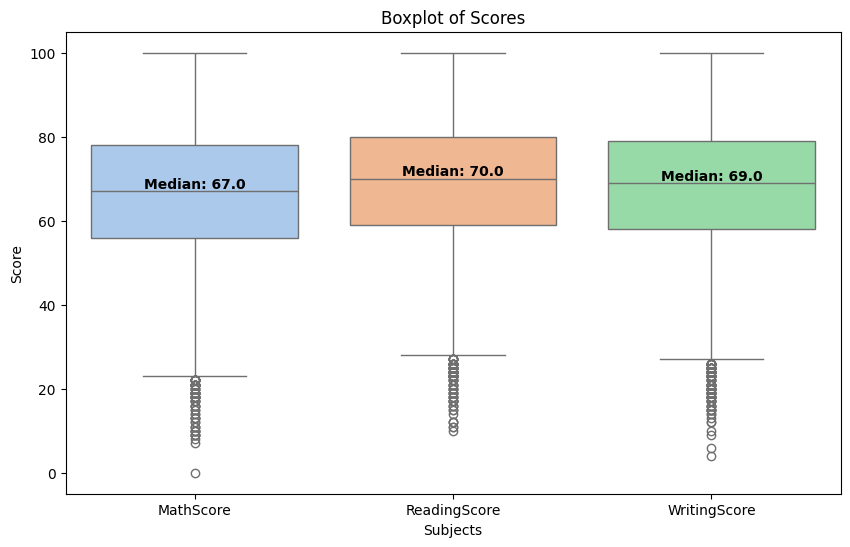

In [ ]:
# 9. Boxplot gabungan dengan keterangan median
plt.figure(figsize=(10, 6))
box = sns.boxplot(data=df[numeric_cols], palette='pastel')
plt.title('Boxplot of Scores')
plt.ylabel('Score')
plt.xlabel('Subjects')

# Menambahkan keterangan median pada boxplot gabungan
medians = df[numeric_cols].median()
for i, median in enumerate(medians):
    plt.text(i, median, f'Median: {median}', 
             horizontalalignment='center', verticalalignment='bottom', 
             fontsize=10, color='black', weight='bold')

plt.savefig('boxplot.png')  # Menyimpan grafik gabungan
plt.show()

In [13]:
# 10. Menyimpan data ke file CSV dan Excel (hanya data asli setelah preprocessing)
df.to_csv('preprocessed_data.csv', index=False)
df.to_excel('preprocessed_data.xlsx', index=False)
print("\nData telah disimpan ke file")


Data telah disimpan ke file


In [14]:
display(df.head())

,ID,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,1,female,unknown,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,2,female,group c,some college,standard,unknown,married,sometimes,yes,0.0,unknown,5 - 10,69,90,88
2,3,female,group b,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,4,male,group a,associate's degree,free/reduced,none,married,never,no,1.0,unknown,5 - 10,45,56,42
4,5,male,group c,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [15]:
display(df_minmax.head())

,ID,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,1,female,unknown,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,0.71,0.677778,0.729167
1,2,female,group C,some college,standard,unknown,married,sometimes,yes,0.0,unknown,5 - 10,0.69,0.888889,0.875000
2,3,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,0.87,0.922222,0.906250
3,4,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,unknown,5 - 10,0.45,0.511111,0.395833
4,5,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,0.76,0.755556,0.739583


In [16]:
display(df_zscore.head())

,ID,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,1,female,unknown,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,0.289141,0.109933,0.361412
1,2,female,group C,some college,standard,unknown,married,sometimes,yes,0.0,unknown,5 - 10,0.158944,1.397308,1.267955
2,3,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,1.330715,1.600578,1.462215
3,4,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,unknown,5 - 10,-1.403417,-0.906416,-1.710688
4,5,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,0.614633,0.584229,0.426165
